In [25]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

In [35]:
# Read CSV File
df = pd.read_csv('ridership.csv')

# List Column Names
column_names = df.columns
print(column_names)

Index(['date', 'bus_rkl', 'bus_rkn', 'bus_rpn', 'rail_lrt_ampang',
       'rail_mrt_kajang', 'rail_lrt_kj', 'rail_monorail', 'rail_mrt_pjy',
       'rail_ets', 'rail_intercity', 'rail_komuter_utara', 'rail_tebrau',
       'rail_komuter'],
      dtype='object')


In [36]:
# List of Columns to Delete
columns_to_delete = ['bus_rkn', 'bus_rpn', 'rail_tebrau', 'rail_intercity', 'rail_komuter_utara', 'rail_komuter']

# Delete Columns using drop()
df.drop(columns=columns_to_delete, inplace=True)

# Save the Updated DataFrame to a New CSV File
df.to_csv('new_dataset2.csv', index=False)

# Display the Updated DataFrame
df.head()

,date,bus_rkl,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets
0,2019-01-01,NaN,113357,114173,139634,35804,NaN,NaN
1,2019-01-02,NaN,182715,169316,274224,31859,NaN,NaN
2,2019-01-03,NaN,187904,175304,286469,31893,NaN,NaN
3,2019-01-04,NaN,198420,187891,304755,34121,NaN,NaN
4,2019-01-05,NaN,120773,112660,145036,29950,NaN,NaN


In [37]:
# PERFORM MEAN SUBSTITUTION FOR MISSING VALUES

df = pd.read_csv('new_dataset2.csv')

# Exclude the 'date' column from mean calculation
means = df.drop('date', axis=1).mean().round()

# Fill missing values with mean for each column (excluding 'date')
df.iloc[:, 1:] = df.iloc[:, 1:].fillna(means)

# Save the modified DataFrame to a new CSV file or overwrite the existing one
df.to_csv('new_dataset2.csv', index=False)

df.head()

,date,bus_rkl,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets
0,2019-01-01,152508.0,113357,114173,139634,35804,59758.0,7028.0
1,2019-01-02,152508.0,182715,169316,274224,31859,59758.0,7028.0
2,2019-01-03,152508.0,187904,175304,286469,31893,59758.0,7028.0
3,2019-01-04,152508.0,198420,187891,304755,34121,59758.0,7028.0
4,2019-01-05,152508.0,120773,112660,145036,29950,59758.0,7028.0


In [38]:
# List of columns representing passenger counts by rail type
rail_columns = [
    'bus_rkl', 'rail_lrt_ampang', 'rail_mrt_kajang',
       'rail_lrt_kj', 'rail_monorail', 'rail_mrt_pjy', 'rail_ets'
]

# Add a new column 'total_passengers' which is the sum of passenger counts by date
df['total_passengers'] = df[rail_columns].sum(axis=1)

# Save the modified DataFrame to a new CSV file or overwrite the existing one
df.to_csv('new_dataset2.csv', index=False)

# Display the updated DataFrame
df.head()

,date,bus_rkl,rail_lrt_ampang,rail_mrt_kajang,rail_lrt_kj,rail_monorail,rail_mrt_pjy,rail_ets,total_passengers
0,2019-01-01,152508.0,113357,114173,139634,35804,59758.0,7028.0,622262.0
1,2019-01-02,152508.0,182715,169316,274224,31859,59758.0,7028.0,877408.0
2,2019-01-03,152508.0,187904,175304,286469,31893,59758.0,7028.0,900864.0
3,2019-01-04,152508.0,198420,187891,304755,34121,59758.0,7028.0,944481.0
4,2019-01-05,152508.0,120773,112660,145036,29950,59758.0,7028.0,627713.0


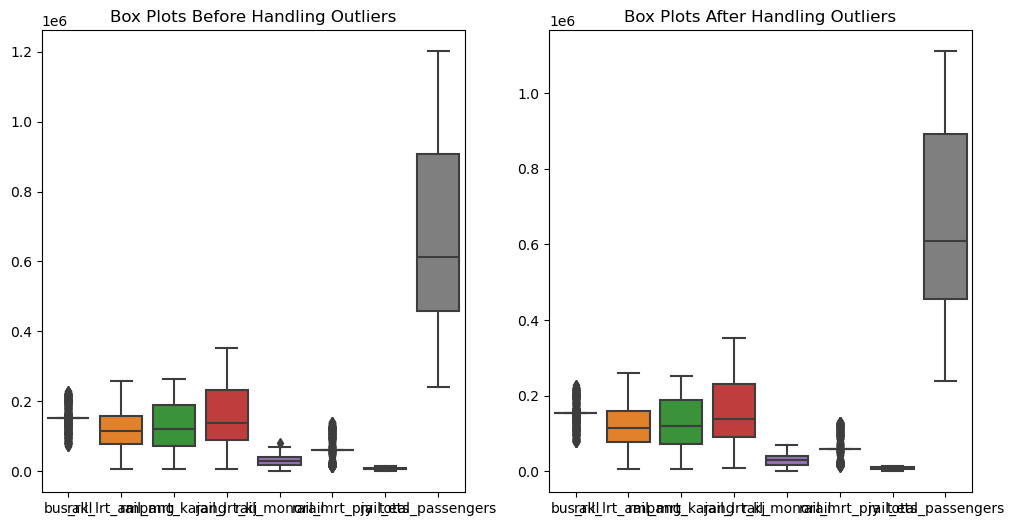


Descriptive Statistics After Handling Outliers:
             bus_rkl  rail_lrt_ampang  rail_mrt_kajang    rail_lrt_kj  \
count    1805.000000      1805.000000      1805.000000    1805.000000   
mean   152073.799446    118210.521330    124284.243767  160299.660388   
std     24490.286399     55738.115403     64710.533689   92884.801504   
min     77263.000000      6587.000000      4973.000000    7195.000000   
25%    152508.000000     78153.000000     70832.000000   89219.000000   
50%    152508.000000    113102.000000    119373.000000  138231.000000   
75%    152508.000000    158400.000000    189235.000000  229233.000000   
max    228881.000000    258313.000000    250467.000000  352328.000000   

       rail_monorail   rail_mrt_pjy      rail_ets  total_passengers  
count    1805.000000    1805.000000   1805.000000      1.805000e+03  
mean    28581.551801   59055.042659   6988.410526      6.494932e+05  
std     15139.349284   22502.771766   3748.922175      2.405757e+05  
min      1392

In [39]:
df = pd.read_csv('new_dataset2.csv')

# Specify the columns to check for outliers (excluding 'date' column)
columns_to_check = df.columns.difference(['date'])

# Calculate z-scores for each column
z_scores = zscore(df[columns_to_check])

# Set a threshold for z-scores (e.g., 3 or -3)
threshold = 3

# Identify and handle outliers
outliers_before = (abs(z_scores) > threshold).any(axis=1)
df_before = df.copy()  # Create a copy for comparison
df = df[~outliers_before]

# Calculate the mean and round off to the nearest whole number (excluding 'date')
rounded_means = df.drop('date', axis=1).mean().round()

# Fill missing values with rounded mean for each column (excluding 'date')
df.iloc[:, 1:] = df.iloc[:, 1:].fillna(rounded_means)

# Visualize box plots before and after handling outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_before)
plt.title("Box Plots Before Handling Outliers")

plt.subplot(1, 2, 2)
sns.boxplot(data=df)
plt.title("Box Plots After Handling Outliers")

plt.show()

# Descriptive statistics after handling outliers
print("\nDescriptive Statistics After Handling Outliers:")
print(df.describe())

# Count of outliers after handling
outliers_after = (abs(zscore(df[columns_to_check])) > threshold).any(axis=1)
print("Number of outliers after handling:", outliers_after.sum())

# Save the modified DataFrame to a new CSV file or overwrite the existing one
df.to_csv('new_dataset2.csv', index=False)

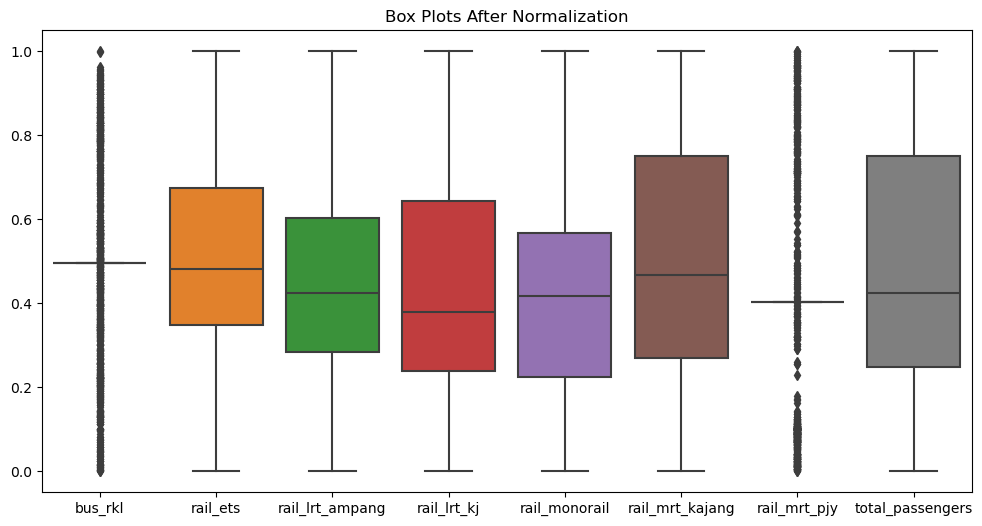


Descriptive Statistics After Normalization:
           bus_rkl  rail_lrt_ampang  rail_mrt_kajang  rail_lrt_kj  \
count  1805.000000      1805.000000      1805.000000  1805.000000   
mean      0.493416         0.443433         0.486005     0.443611   
std       0.161526         0.221424         0.263593     0.269128   
min       0.000000         0.000000         0.000000     0.000000   
25%       0.496280         0.284301         0.268271     0.237659   
50%       0.496280         0.423139         0.465999     0.379668   
75%       0.496280         0.603088         0.750576     0.643340   
max       1.000000         1.000000         1.000000     1.000000   

       rail_monorail  rail_mrt_pjy     rail_ets  total_passengers  
count    1805.000000   1805.000000  1805.000000       1805.000000  
mean        0.403101      0.397257     0.477392          0.470516  
std         0.224450      0.190414     0.257942          0.276078  
min         0.000000      0.000000     0.000000          0.00

In [40]:
df = pd.read_csv('new_dataset2.csv')

# Specify the columns to normalize (excluding 'date' column)
columns_to_normalize = df.columns.difference(['date'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the specified columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Visualize box plots after normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_normalize])
plt.title("Box Plots After Normalization")
plt.show()

# Descriptive statistics after normalization
print("\nDescriptive Statistics After Normalization:")
print(df.describe())

# Save the normalized DataFrame to a new CSV file or overwrite the existing one
df.to_csv('new_dataset2.csv', index=False)

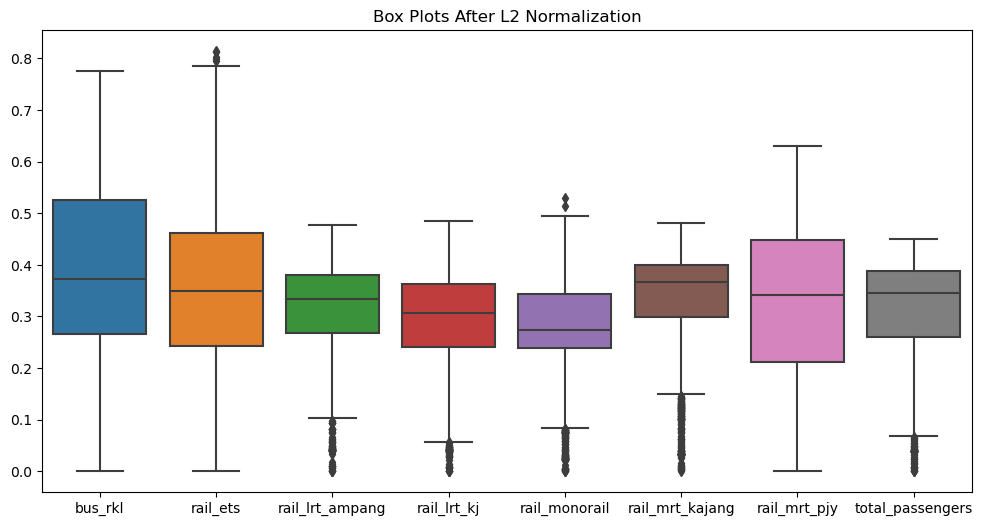


Descriptive Statistics After L2 Normalization:
           bus_rkl  rail_lrt_ampang  rail_mrt_kajang  rail_lrt_kj  \
count  1805.000000      1805.000000      1805.000000  1805.000000   
mean      0.400564         0.311878         0.331038     0.299535   
std       0.172019         0.090405         0.101419     0.109377   
min       0.000000         0.000000         0.000000     0.000000   
25%       0.266028         0.267114         0.298610     0.240704   
50%       0.371649         0.334244         0.367273     0.307098   
75%       0.525147         0.380288         0.399730     0.363597   
max       0.774850         0.476454         0.481092     0.485142   

       rail_monorail  rail_mrt_pjy     rail_ets  total_passengers  
count    1805.000000   1805.000000  1805.000000       1805.000000  
mean        0.275921      0.328671     0.343759          0.316562  
std         0.095993      0.164699     0.181723          0.105527  
min         0.000000      0.000000     0.000000          0

In [41]:
df = pd.read_csv('new_dataset2.csv')

# Specify the columns to normalize (excluding 'date' column)
columns_to_normalize = df.columns.difference(['date'])

# Perform L2 normalization on the specified columns
df[columns_to_normalize] = normalize(df[columns_to_normalize], norm='l2')

# Visualize box plots after L2 normalization
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[columns_to_normalize])
plt.title("Box Plots After L2 Normalization")
plt.show()

# Descriptive statistics after L2 normalization
print("\nDescriptive Statistics After L2 Normalization:")
print(df.describe())

# Save the normalized DataFrame to a new CSV file or overwrite the existing one
df.to_csv('new_dataset2.csv', index=False)

In [42]:
# Specify the features (X) and the target variable (y)

# Assuming 'Date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Ensure the 'Date' column is in the correct datetime64 format
df['date'] = df['date'].astype('datetime64[ns]')

# Convert datetime to numerical values for plotting
df['Date_numeric'] = df['date'].astype('int64')

# Assuming X contains your features and y is the target variable (Ridership)
X = df[['Date_numeric']]
y = df['total_passengers']

# Normalize features to a range between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1444, 1) (1444,)
Testing set shape: (361, 1) (361,)


In [44]:
# Create a simple neural network model
model = Sequential()
model.add(Dense(10, input_dim=1, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

12/12 [==============================] - 0s 2ms/step
Mean Squared Error: 0.011608438728118346


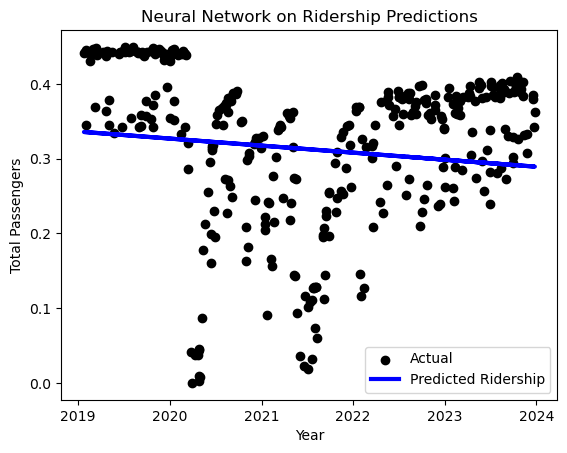

In [47]:
# Visualize the results

# Invert scaling and extract dates (if applicable)
X_test_inverse = scaler.inverse_transform(X_test)
dates_test = pd.to_datetime(X_test_inverse[:, 0])

# Create the plot
plt.scatter(dates_test, y_test, color='black', label='Actual')
plt.plot(dates_test, y_pred, linewidth=3,color='blue', label='Predicted Ridership')

# Add labels, title, and legend
plt.xlabel('Year')
plt.ylabel('Total Passengers')
plt.title('Neural Network on Ridership Predictions')
plt.legend()

# Display the plot
plt.show()